In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bands.csv')
df

,19910108,X126,TVGUIDE,25503,YES,KEY,YES.1,BENTON,GALLATIN,UNCOATED,...,36.4,0,0.1,2.5,1,34,40,105,100,band
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
536,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
537,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
538,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


In [3]:
df.columns=[
    "timestamp",  
    "cylinder number",
    "customer",
    "job number",
    "grain screened",
    "ink color",
    "proof on ctd ink",
    "blade mfg",
    "cylinder division",
    "paper type",
    "ink type",
    "direct steam",
    "solvent type",
    "type on cylinder",
    "press type",
    "press",
    "unit number",
    "cylinder size",
    "paper mill location",
    "plating tank",
    "proof cut",
    "viscosity",
    "caliper",
    "ink temperature",
    "humidity",
    "roughness",
    "blade pressure",
    "varnish pct",
    "press speed",
    "ink pct",
    "solvent pct",
    "ESA Voltage",
    "ESA Amperage",
    "wax",
    "hardener",
    "roller durometer",
    "current density",
    "anode space ratio",
    "chrome content",
    "band type"
]
df

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,...,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
536,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
537,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
538,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


In [4]:
df.replace('?',np.nan,inplace=True)

In [5]:
df.drop('timestamp',axis=1,inplace=True)

In [6]:
num_cols = [
    'proof cut',
    'viscosity',
    'caliper',
    'ink temperature',
    'humidity',
    'roughness',
    'blade pressure',
    'varnish pct',
    'press speed',
    'ink pct',
    'solvent pct',
    'ESA Voltage',
    'ESA Amperage',
    'wax',
    'hardener',
    'roller durometer',
    'current density',
    'anode space ratio',
    'chrome content'
]

In [7]:
df[num_cols]=df[num_cols].replace('band',np.nan)

In [8]:
from sklearn.impute import SimpleImputer
df[num_cols]=df[num_cols].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cylinder number      539 non-null    object 
 1   customer             540 non-null    object 
 2   job number           539 non-null    object 
 3   grain screened       491 non-null    object 
 4   ink color            540 non-null    object 
 5   proof on ctd ink     483 non-null    object 
 6   blade mfg            480 non-null    object 
 7   cylinder division    540 non-null    object 
 8   paper type           540 non-null    object 
 9   ink type             539 non-null    object 
 10  direct steam         515 non-null    object 
 11  solvent type         484 non-null    object 
 12  type on cylinder     521 non-null    object 
 13  press type           539 non-null    object 
 14  press                539 non-null    object 
 15  unit number          540 non-null    flo

In [10]:
mean_imp=SimpleImputer(strategy='mean')
mode_imp=SimpleImputer(strategy='most_frequent')

In [11]:
df[num_cols]=mean_imp.fit_transform(df[num_cols])
cat_cols=df.select_dtypes(include='object').columns
for c in cat_cols:
    df[c]=df[c].str.lower()
df[cat_cols]=mode_imp.fit_transform(df[cat_cols])

In [13]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le=LabelEncoder()
for c in cat_cols:
    df[c]=le.fit_transform(df[c])

In [14]:
df.isnull().sum()

cylinder number        0
customer               0
job number             0
grain screened         0
ink color              0
proof on ctd ink       0
blade mfg              0
cylinder division      0
paper type             0
ink type               0
direct steam           0
solvent type           0
type on cylinder       0
press type             0
press                  0
unit number            0
cylinder size          0
paper mill location    0
plating tank           0
proof cut              0
viscosity              0
caliper                0
ink temperature        0
humidity               0
roughness              0
blade pressure         0
varnish pct            0
press speed            0
ink pct                0
solvent pct            0
ESA Voltage            0
ESA Amperage           0
wax                    0
hardener               0
roller durometer       0
current density        0
anode space ratio      0
chrome content         0
band type              0
dtype: int64

In [15]:
x=df.iloc[:,:-1]
x

,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg,cylinder division,paper type,ink type,...,ink pct,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content
0,332,64,24,2,1,2,1,1,3,2,...,54.900000,38.500000,0.000000,0.000000,2.5,0.7,34.00000,40.0,105.00,100.0
1,20,52,245,2,1,2,1,1,3,0,...,53.800000,39.800000,0.000000,0.000000,2.8,0.9,40.00000,40.0,103.87,100.0
2,244,50,238,2,1,2,1,1,3,2,...,55.600000,38.800000,0.000000,0.000000,2.5,1.3,40.00000,40.0,108.06,100.0
3,173,47,194,1,1,2,1,1,3,0,...,57.500000,42.500000,5.000000,0.000000,2.3,0.6,35.00000,40.0,106.67,100.0
4,250,50,228,2,1,2,1,1,3,2,...,53.800000,37.600000,5.000000,0.000000,2.5,0.8,40.00000,40.0,103.87,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,13,47,259,1,1,2,1,1,2,2,...,55.649172,38.572133,1.322095,0.038223,1.0,1.0,34.77686,40.0,112.50,100.0
536,178,9,232,1,1,2,1,1,2,0,...,55.649172,38.572133,1.322095,0.038223,0.0,0.0,34.77686,40.0,110.00,100.0
537,12,47,260,1,1,2,1,1,2,0,...,55.649172,38.572133,1.322095,0.038223,2.7,2.8,34.77686,40.0,108.00,100.0
538,15,47,260,1,1,2,1,1,2,2,...,55.649172,38.572133,1.322095,0.038223,1.5,2.3,34.77686,40.0,108.00,100.0


In [16]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
535    0
536    0
537    0
538    0
539    0
Name: band type, Length: 540, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f'Train Accuracy:{accuracy_score(train_pred,y_train)}')
print(f'Test Accuracy:{accuracy_score(test_pred,y_test)}')

Train Accuracy:1.0
Test Accuracy:0.8611111111111112


Train set:


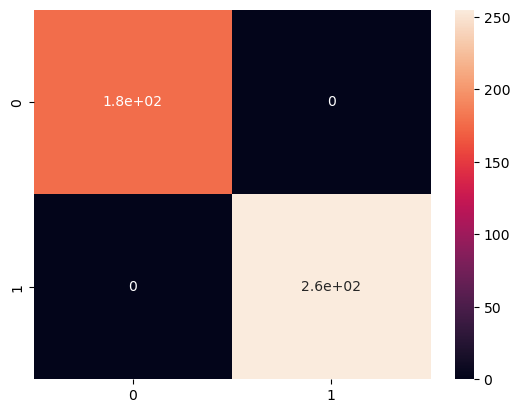

Test set:


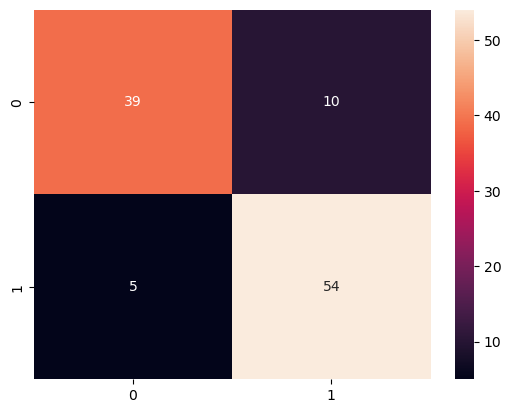

In [21]:
print('Train set:')
sns.heatmap(confusion_matrix(y_train,train_pred),annot=True)
plt.show()
print('Test set:')
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True)
plt.show()